# Multiple Variable Regression

# Theoratical Part

We are going to look into linear regression mutiple Varibale also known as **MultiVariant Regression** using this we are going to predict the home prices in Monroe township New Jersey 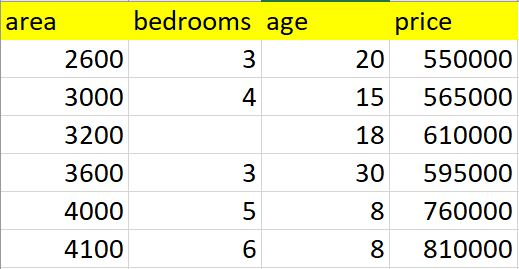

Here in this table we have various mertics available such as area bedroom, age and these are the factors that ultimate price depends on. In the previous chapter we looked at simple linear regression with one variable while price was dependent only on area but now we are making our problem a little more complex by adding bedrooms and age because as we know in our normal life the home price depends on multiple factors not just the square foot area after we build a model we are going to predict prices of these 2 homes.

Given these homes prices find out price of a home that has,
$$3000-sqrt-ft-area, 3-bedrooms, 40-year-old $$
$$2500-sqrt-ft-area, 4-bedrooms, 5-year-old $$

Now before we tackle any ML problem the first thing that needs to be done is that we need to carefully analyze our dataset or our training data when we look to that dataset the first thing that we notice is that there is a datapoint missing so we have to do something to handle this missing data point or NAN value, another thing that we notice is that there is a linear relation between each of these factors and our target variable which is price.

For example as the home gets older, the price tends to go down, here we have 3200 square feet home with 18 years of age and the price is more than 60k where as we have a little bigger home with 3600 sqrtft but since the age is more like 30 so the price is less than 60k.

Similarly as the area and the number of bedrooms go up the price also tend to go up so overall by analysis we can say that for this data set we can use linear regression safely

If we can go to math side a little bit:
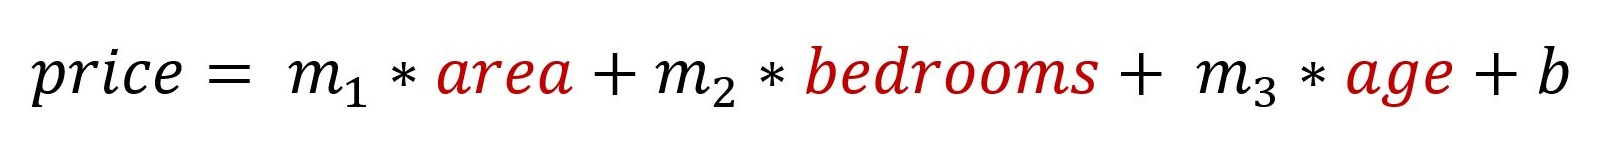

Then our linear equation will look something like this where price is dependent on 3 factors such as area, bedrooms, age and these 3 factors are called **independent variables or features**.

Features is a term that we will hear often while going through ML material so it is nothing but an independent variable and the price is an dependent variable.

So m1,m2 and m3 are called coefficients and b is an intercept
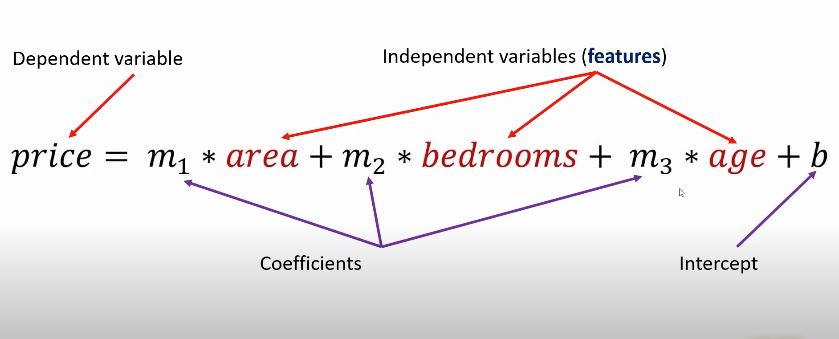

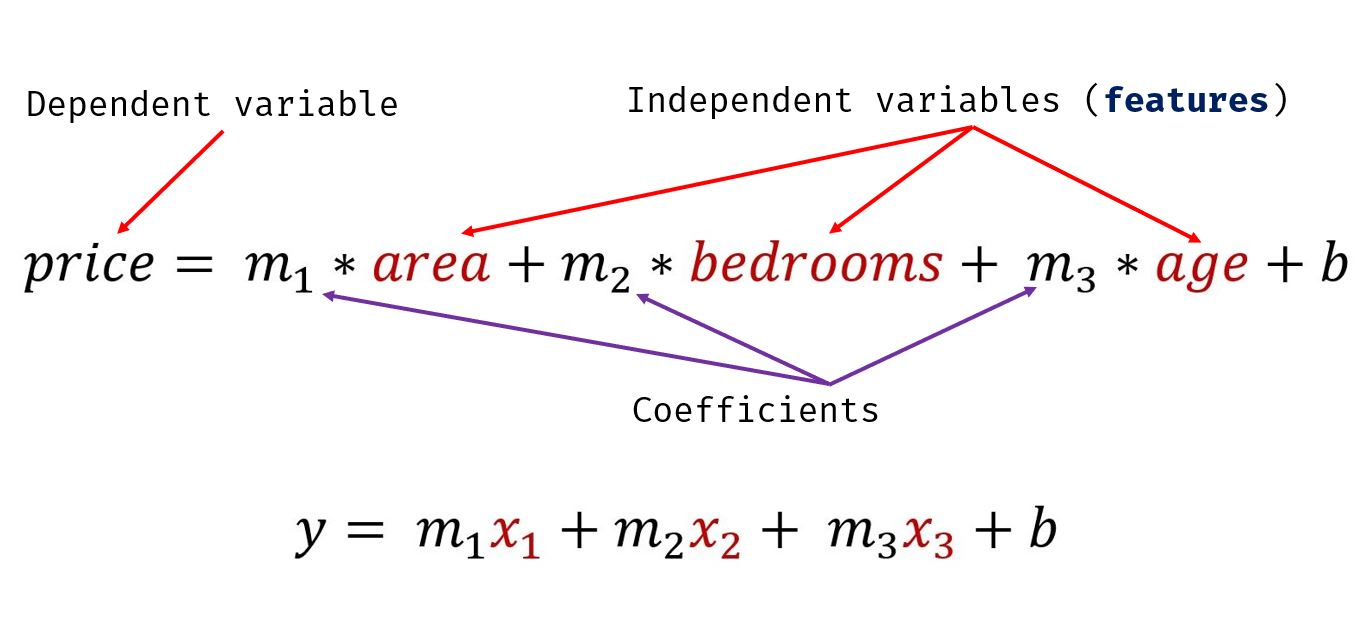

It can be generalized into this equation where we can have n numbers of independent variables, we have just 3 here:
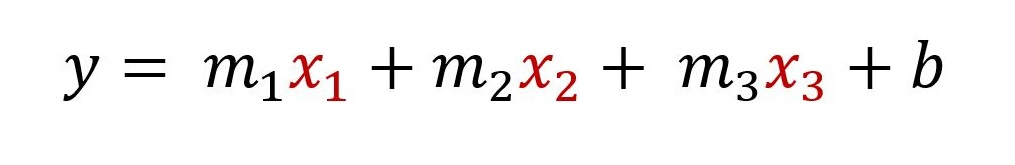

But it can be more than 3.

Now the topics that we are going to cover during this chapter is first we look into:

1) Data PreProcessing: Handling NA Values
2) Linear Regression using multiple variables

# Coding practical Part

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [4]:
df = pd.read_csv('02_homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [12]:
#finding NAN Value
import math
median_bedroom = math.floor(df.bedrooms.median())
median_bedroom

4

In [13]:
# filling NA values
df.bedrooms = df.bedrooms.fillna(median_bedroom)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [14]:
# Before applying any ML modeling we need to preprocess th data which simply means cleaning the data

In [16]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price) # in this the indepent variables are present in [[]] and the target variable is df.price

LinearRegression()

In [17]:
# model is built

In [18]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

Just to summarize what these coeffient expression are:
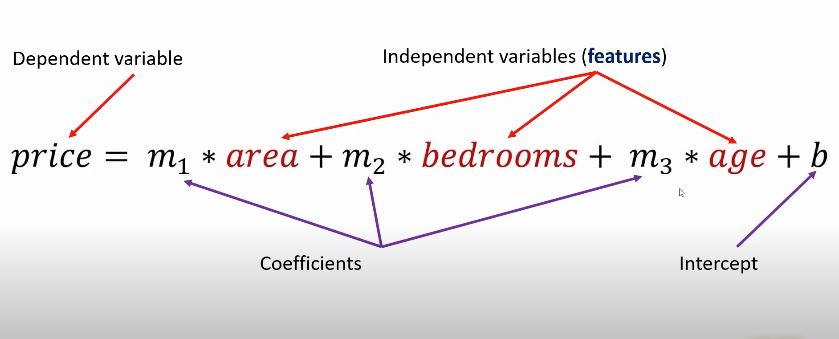

So respectively m1 m2 and m3 are coefficients as we find

In [20]:
reg.intercept_

np.float64(221323.0018654043)

So this intercept number is b in the fig

Now based on this we can calculate the price

In [25]:
reg.predict([[3000,3,40]])

C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [28]:
112.06244194*3000+23388.88007794*3+-3231.71790863*40+221323.0018654043 # confirmation

498408.2515740243

In [29]:
reg.predict([[2500,4,5]])

C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

In [30]:
112.06244194*2500+23388.88007794*4+-3231.71790863*5+221323.0018654043 # confirmation

578876.0374840144